In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 清洗数据表
df = pd.read_csv('CDNOW_master.txt', sep='\s+', header=None)
df.columns = ['id','date','quantity','amount']
df['date'] = pd.to_datetime(df['date'].astype(str))

In [3]:
df.head(10)

,id,date,quantity,amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


In [4]:
# 创建符合预测模型要求的DataFrame
df1 = df.groupby('date')[['amount']].sum().reset_index()
df1.columns = ['ds','y']

In [5]:
# 创建训练集和测试集
df1_train = df1.iloc[:-3]
df1_test = df1.iloc[-3:]

In [6]:
df1_train.head()

,ds,y
0,1997-01-01,7515.35
1,1997-01-02,8025.95
2,1997-01-03,7475.04
3,1997-01-04,6722.93
4,1997-01-05,9274.80


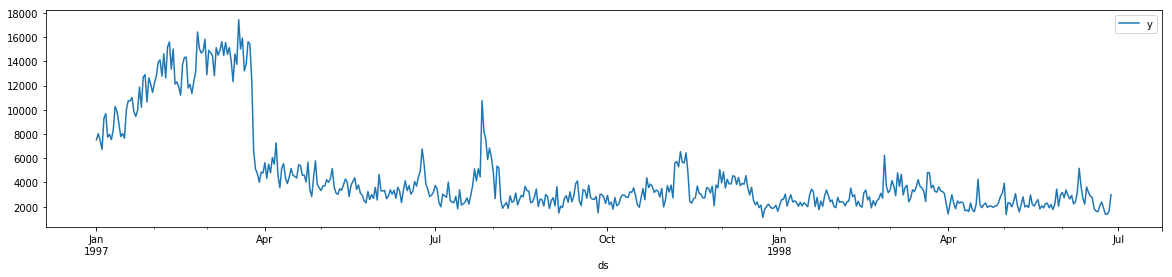

In [7]:
# 时间序列折线图
df1_train.set_index('ds').plot(figsize=(20,4))

In [8]:
# 构建预测模型
from fbprophet import Prophet
m = Prophet()
m.fit(df1_train)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
# 设置预测数据集
future = m.make_future_dataframe(periods=3)
future.tail(3)

,ds
543,1998-06-28
544,1998-06-29
545,1998-06-30


In [10]:
# 对预测数据集进行预测
forecast = m.predict(future)
forecast[['ds','yhat']].tail(3)

,ds,yhat
543,1998-06-28,2659.773226
544,1998-06-29,2713.123753
545,1998-06-30,2521.518613


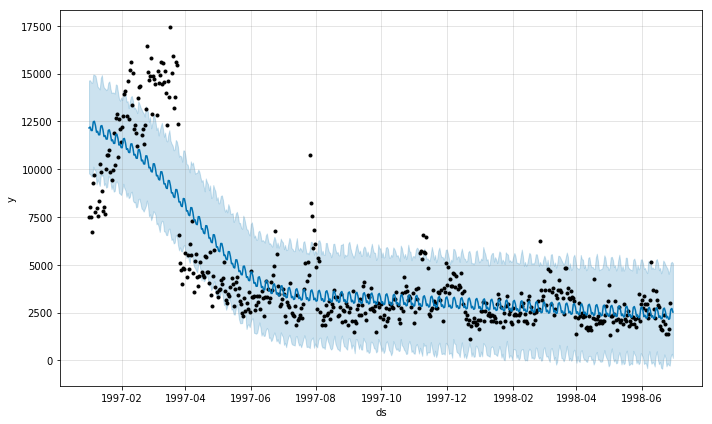

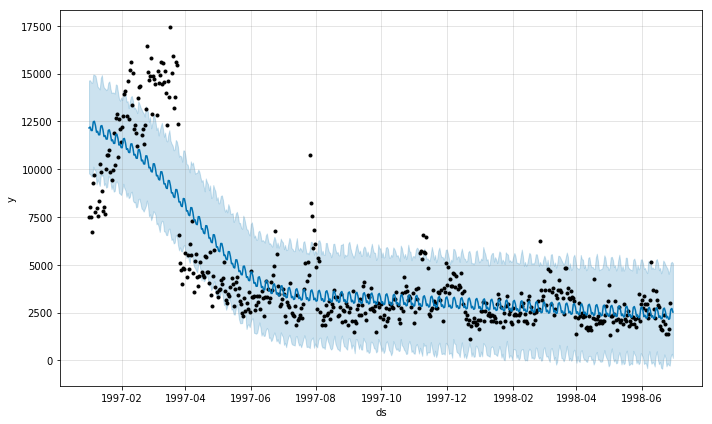

In [11]:
# 预测图
m.plot(forecast)

In [31]:
# 实际值与预测值对比表
forecast[['ds','yhat']].tail(3).join(df1_test['y'])

,ds,yhat,y
543,1998-06-28,2659.773226,1388.44
544,1998-06-29,2713.123753,2003.36
545,1998-06-30,2521.518613,2180.65
